<h1>Импорт библиотек

In [45]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [112]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])
    for i in range(len(X)):
        result += np.dot(X[i], V[i])
    return result 
     
X = [np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])]
V = [np.array([[1], [2], [3]]), np.array([[3], [2], [1]])]
result = sum_prod(X, V)
answer = np.array([[64], [64], [64]])
if np.array_equal(result, answer) == True:
    print("Тест успешно выполнен!")
else:
    print("Тест не выполнен")



Тест успешно выполнен!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [113]:
def binarize(M, threshold=0.5):
    binary_M = np.where(M > threshold, 1, 0)
    return binary_M

M = np.random.rand(5,5)
M = np.round(M, 1)
print("Исходная матрица:", "\n", M)
print("Бинарная матрица:", "\n", binarize(M))

Исходная матрица: 
 [[0.  0.5 0.4 0.7 0.7]
 [0.6 0.9 0.1 0.7 0.6]
 [0.4 0.  0.4 0.4 0.7]
 [0.1 0.4 0.5 0.6 0.3]
 [0.2 0.5 0.5 0.5 0. ]]
Бинарная матрица: 
 [[0 0 0 1 1]
 [1 1 0 1 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [114]:
def unique_rows(mat):
    unique_rows = []
    for row in mat:
        unique_rows.append(list(set(row)))
    return unique_rows
    
def unique_columns(mat):
    n_rows = len(mat)
    n_cols = len(mat[0])
    unique_cols = [[] for m in range(n_cols)]
    for i in range(n_cols):
        col = [mat[j][i] for j in range(n_rows)]
        unique_cols[i] = list(set(col))
    return unique_cols
    
m_rows = [
    [1, 2, 3, 4, 5],
    [5, 6, 7, 7, 4],
    [5, 4, 3, 1, 3]
]

print(unique_rows(m_rows))

m_cols = [
    [1, 5, 2, 9],
    [2, 5, 1, 8],
    [3, 4, 1, 7],
    [4, 3, 2, 6]
]

print(unique_columns(m_cols))


[[1, 2, 3, 4, 5], [4, 5, 6, 7], [1, 3, 4, 5]]
[[1, 2, 3, 4], [3, 4, 5], [1, 2], [8, 9, 6, 7]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

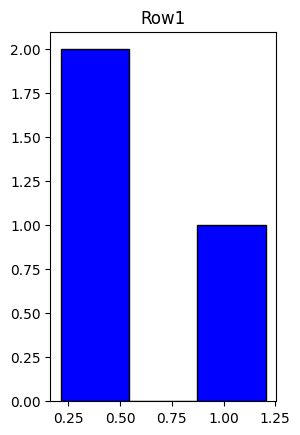

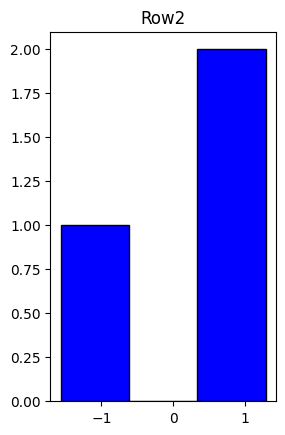

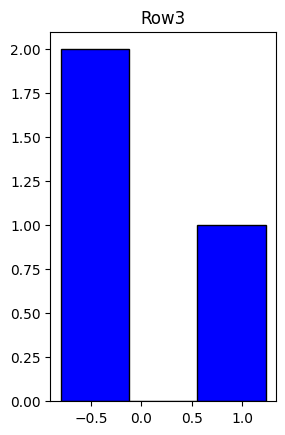

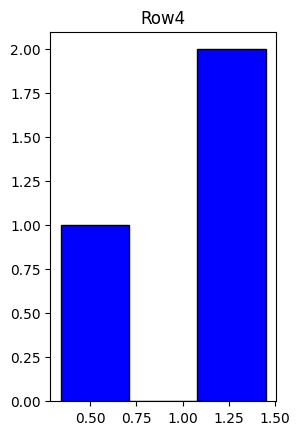

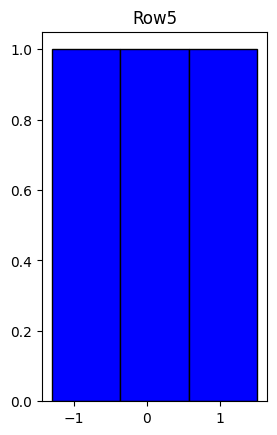

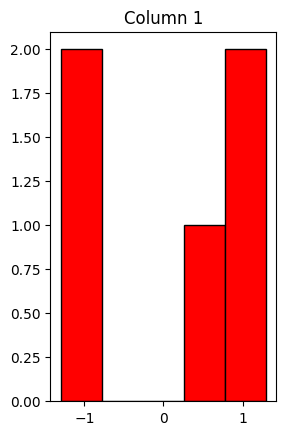

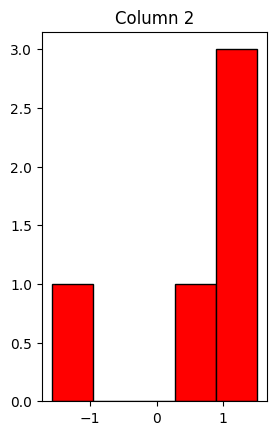

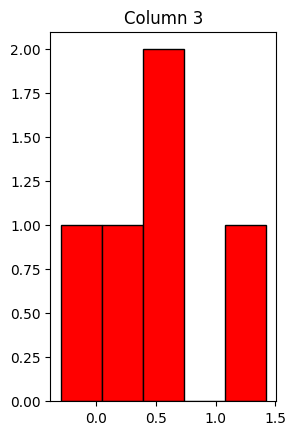

Матрица: 
 [[ 1.20356119  0.50868338  0.21301103]
 [ 1.29159312 -1.56650559  0.4817963 ]
 [-0.79901119  1.23007845 -0.29371156]
 [ 0.34193694  1.44912225  1.41925364]
 [-1.29909938  1.50492917  0.405436  ]]
Мат.ожидания для строк: [0.64175186 0.06896127 0.04578523 1.07010428 0.20375526]
Мат.ожидания для столбцов: [0.14779614 0.62526153 0.44515708]
Дисперсии для строк: [0.17238521 1.44667108 0.74382983 0.26526252 1.33076691]
Дисперсии для столбцов: [1.09011056 1.32715975 0.31032059]


In [115]:
def Work_Matrix(m, n):
    mat = np.random.randn(m, n)
    row_mat = np.mean(mat, axis = 1)
    col_mat = np.mean(mat, axis = 0)
    row_v = np.var(mat, axis = 1)
    col_v = np.var(mat, axis = 0)

    for i in range(m):
        plt.figure()
        plt.subplot(1,2,1)
        plt.hist(mat[i, :], bins = n, color ="b", edgecolor="black")
        plt.title(f"Row{i+1}")
        plt.show()
    for i in range(n):
        plt.subplot(1,2,2)
        plt.hist(mat[:,i], bins = m, color = "r", edgecolor = "black")
        plt.title(f"Column {i+1}")
        plt.show()

    return row_mat, col_mat, row_v, col_v, mat

m = 5
n = 3
row_mat, col_mat, row_v, col_v, mat  = Work_Matrix(m,n)
print("Матрица:", "\n", mat)
print("Мат.ожидания для строк:", row_mat)
print("Мат.ожидания для столбцов:",col_mat)
print("Дисперсии для строк:", row_v)
print("Дисперсии для столбцов:", col_v)

        

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [34]:
def chess(m, n, a, b):
    M = np.indices((m, n)).sum(axis = 0) % 2
    M = M*b - (M - 1) * a
    return M

print(chess(2,2,1,3))
print(chess(6,4,0,1))
print(chess(7,7,5,9))

[[1 3]
 [3 1]]
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]
[[5 9 5 9 5 9 5]
 [9 5 9 5 9 5 9]
 [5 9 5 9 5 9 5]
 [9 5 9 5 9 5 9]
 [5 9 5 9 5 9 5]
 [9 5 9 5 9 5 9]
 [5 9 5 9 5 9 5]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

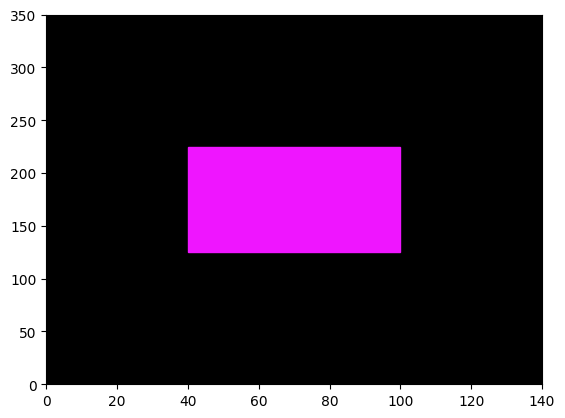

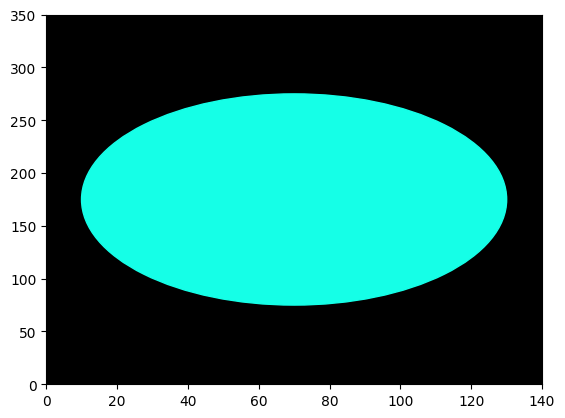

In [116]:
import matplotlib.patches as patches
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    background = patches.Rectangle((0, 0), m, n, color = background_color)
    rect = patches.Rectangle(((m - a)/2, (n-b)/2), a, b, color = rectangle_color)                     
    ax.add_patch(background)
    ax.add_patch(rect)
    plt.xlim(0, m)
    plt.ylim(0, n)
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    a *= 2
    b *= 2
    fig = plt.figure()
    ax = fig.add_subplot(111)
    background = patches.Rectangle((0, 0), m, n, color = background_color)
    eli = patches.Ellipse((m/2, n/2), a, b, color = ellipse_color)
    ax.add_patch(background)
    ax.add_patch(eli)
    plt.xlim(0, m)
    plt.ylim(0, n)
    plt.show()

draw_rectangle(60, 100, 140, 350, "#EF15FF","000000")
draw_ellipse(60,100, 140, 350, "#15FFE7", "000000")

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [117]:
def data_time_series(ts,p):
    mat = np.mean(ts)
    var = np.var(ts)
    std = np.std(ts)
    local_min = []
    local_max = []
    for i in range(1, len(ts) - 1):
        if ts[i] < ts[i - 1] and ts[i] < ts[i + 1]:
            local_min.append(ts[i])
        if ts[i] > ts [i - 1] and ts[i] > ts[i + 1]:
            local_max.append(ts[i])
    method = np.convolve(ts,np.ones(p), mode ="valid") / p
    return mat, var, std, local_min, local_max, method

ts = np.array([4,7,10,14,6,8,5,3,1,2])
p = 4
mat, var, std, local_min, local_max, method = data_time_series(ts,p)
print("Мат.ожидание:", mat)
print("Дисперсия:", var)
print("СКО:", std)
print("Локальные минимумы:", local_min)
print("Локальные максимумы:", local_max)
print("Метод скользящего среднего:", method)

Мат.ожидание: 6.0
Дисперсия: 14.0
СКО: 3.7416573867739413
Локальные минимумы: [6, 1]
Локальные максимумы: [14, 8]
Метод скользящего среднего: [8.75 9.25 9.5  8.25 5.5  4.25 2.75]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [118]:
def one_hot_encoding(vect):
    encod = np.zeros((len(vect),len(vect)),dtype=int)
    for i, label in enumerate(vect):
        encod[i,label] = 1
    return encod.tolist()

print(one_hot_encoding([0,2,3,0]))
print(one_hot_encoding([1,0,2,2]))
print(one_hot_encoding([1,1,1,1]))

[[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]
[[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0]]
[[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0]]
